In [1]:
%matplotlib inline

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, make_circles

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

#from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, LinearSVR, SVC, OneClassSVM
from sklearn.neighbors import KNeighborsClassifier

# Support Vector Machines

In [3]:
iris_dataset = load_iris()
attributes, targets = iris_dataset["data"], iris_dataset["target"]

In [4]:
poly_attributes = PolynomialFeatures(degree = 3).fit_transform(attributes)

In [5]:
simple_svm = LinearSVC(C = 1e-3)

In [6]:
simple_svm.fit(attributes, targets)

LinearSVC(C=0.001)

In [7]:
simple_svm.coef_

array([[ 0.01439054,  0.10003519, -0.18606436, -0.08267258],
       [-0.03772183, -0.07470322,  0.03918051,  0.00299675],
       [-0.07744727, -0.09388858,  0.11991681,  0.07658299]])

In [8]:
simple_svm.predict(attributes)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
simple_svm.score(attributes, targets)

0.6666666666666666

In [10]:
poly_svm = LinearSVC(C = 1e-3)
poly_svm.fit(poly_attributes, targets)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.001)

In [11]:
poly_svm.score(poly_attributes, targets)

0.98

In [12]:
poly_attributes.shape

(150, 35)

In [13]:
circles_attributes, circles_targets =  make_circles(noise = 0.08, factor = 0.5, n_samples = 200)

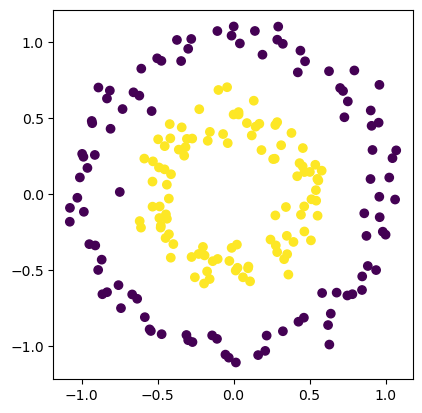

In [14]:
plt.scatter(circles_attributes[:, 0], circles_attributes[:, 1], c = circles_targets)
plt.gca().set_aspect("equal")

In [15]:
circles_svm = LinearSVC()

In [16]:
circles_attributes_poly = PolynomialFeatures(degree = 2).fit_transform(circles_attributes)

In [17]:
circles_svm.fit(circles_attributes_poly, circles_targets)

LinearSVC()

In [18]:
circles_svm.score(circles_attributes_poly, circles_targets)

0.99

In [19]:
circles_attributes_poly.shape

(200, 6)

In [20]:
circles_svm_with_kernel = SVC(kernel = "rbf", degree = 2)

In [21]:
circles_svm_with_kernel.fit(circles_attributes, circles_targets)

SVC(degree=2)

In [22]:
circles_svm_with_kernel.score(circles_attributes, circles_targets)

0.995

In [33]:
knn = KNeighborsClassifier(n_neighbors = 20)

In [34]:
knn.fit(circles_attributes[:-50], circles_targets[:-50])

KNeighborsClassifier(n_neighbors=20)

In [35]:
knn.score(circles_attributes[-50:], circles_targets[-50:])

0.96

In [42]:
pulsars = pd.read_csv("data/pulsar_stars.csv")

In [43]:
pulsars

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [44]:
pulsars.target_class.value_counts(normalize = True)

target_class
0    0.908426
1    0.091574
Name: proportion, dtype: float64

In [46]:
pulsar_attributes_train, pulsar_attributes_test, pulsar_targets_train, pulsar_targets_test = train_test_split(
    pulsars.drop(columns = "target_class"),
    pulsars.target_class,
    test_size = 0.25,
    stratify = pulsars.target_class
)

In [59]:
svm = LinearSVC()

In [60]:
svm.fit(pulsar_attributes_train, pulsar_targets_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [61]:
svm.score(pulsar_attributes_train, pulsar_targets_train)

0.9773523057438724

In [62]:
svm.score(pulsar_attributes_test, pulsar_targets_test)

0.9758659217877095

In [63]:
svm.coef_

array([[ 0.00170603, -0.01406627,  1.57128433, -0.16092429, -0.00620974,
         0.0055022 , -0.10238566,  0.00237835]])

In [69]:
detector = OneClassSVM(nu = 0.95)

In [70]:
detector.fit(pulsar_attributes_train)

OneClassSVM(nu=0.95)

In [71]:
detector.predict(pulsar_attributes_train)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)